In [43]:
# Import the main libraries
import numpy as np
import pandas as pd
import os
import sys
import matplotlib.pyplot as plt

# Import the gensim libraries
import gensim
from gensim.models import word2vec,KeyedVectors

from sklearn.manifold import TSNE

# Import logging to control the log information
import logging

In [ ]:
# Set the logging format
logging.basicConfig(format='%(asctime)s : %(levelname)s : %(message)s', level=logging.INFO)

In [2]:
# Set the global variables
current_dir = sys.path[0]
parent_dir = '{}'.format(os.sep).join(current_dir.split(os.sep)[:-1])
data_dir = os.path.join(parent_dir,'Data')

# Set the file path
text_dir = os.path.join(data_dir,'text8.txt')

# Set the model path
text_model_dir = os.path.join(data_dir,'text8.model')

# Set the key relationships path
text_sentences_dir = os.path.join(data_dir,'text.model.bin')

In [4]:
if not os.path.isfile(text_sentences_dir):
    sentences = word2vec.Text8Corpus(text_dir)
    model = word2vec.Word2Vec(sentences, size=200)
else:
    model = KeyedVectors.load_word2vec_format(os.path.join(data_dir,'text.model.bin'), binary=True)

In [5]:
model.most_similar(positive=['woman', 'king'], negative=['man'], topn=1)

c:\users\tanse\documents\mystuff\temp\tempnlp\nlp\word2vec\venv\lib\site-packages\ipykernel_launcher.py:1: DeprecationWarning: Call to deprecated `most_similar` (Method will be removed in 4.0.0, use self.wv.most_similar() instead).
  """Entry point for launching an IPython kernel.


[('queen', 0.6395106911659241)]

In [6]:
model.most_similar(positive=['woman', 'king'], negative=['man'], topn=2) 

c:\users\tanse\documents\mystuff\temp\tempnlp\nlp\word2vec\venv\lib\site-packages\ipykernel_launcher.py:1: DeprecationWarning: Call to deprecated `most_similar` (Method will be removed in 4.0.0, use self.wv.most_similar() instead).
  """Entry point for launching an IPython kernel.


[('queen', 0.6395106911659241), ('throne', 0.550408124923706)]

In [7]:
model.most_similar(['man'])

c:\users\tanse\documents\mystuff\temp\tempnlp\nlp\word2vec\venv\lib\site-packages\ipykernel_launcher.py:1: DeprecationWarning: Call to deprecated `most_similar` (Method will be removed in 4.0.0, use self.wv.most_similar() instead).
  """Entry point for launching an IPython kernel.


[('woman', 0.6885683536529541),
 ('girl', 0.5818527340888977),
 ('creature', 0.5624756813049316),
 ('boy', 0.5352991819381714),
 ('person', 0.5188018679618835),
 ('men', 0.4907006025314331),
 ('beast', 0.4860415458679199),
 ('stranger', 0.4826732873916626),
 ('evil', 0.4817325472831726),
 ('god', 0.47937360405921936)]

In [8]:
model.save(os.path.join(data_dir,'text8.model'))

In [9]:
model.wv.save_word2vec_format(os.path.join(data_dir,'text.model.bin'), binary=True)

In [30]:
def cosine_distance (model, word,target_list , num) :
    cosine_dict ={}
    word_list = []
    a = model[word]
    for item in target_list :
        if item != word :
            b = model [item]
            cos_sim = np.dot(a, b)/(np.linalg.norm(a)*np.linalg.norm(b))
            cosine_dict[item] = cos_sim
    dist_sort=sorted(cosine_dict.items(), key=lambda dist: dist[1],reverse = True) ## in Descedning order 
    for item in dist_sort:
        word_list.append((item[0], item[1]))
    return word_list[0:num]

In [31]:
word_list = ['big','small','queen']
## Show the most similar Mercedes-Benz SLK-Class by cosine distance 
cosine_distance (model,'yes',word_list,5)

c:\users\tanse\documents\mystuff\temp\tempnlp\nlp\word2vec\venv\lib\site-packages\ipykernel_launcher.py:4: DeprecationWarning: Call to deprecated `__getitem__` (Method will be removed in 4.0.0, use self.wv.__getitem__() instead).
  after removing the cwd from sys.path.
c:\users\tanse\documents\mystuff\temp\tempnlp\nlp\word2vec\venv\lib\site-packages\ipykernel_launcher.py:7: DeprecationWarning: Call to deprecated `__getitem__` (Method will be removed in 4.0.0, use self.wv.__getitem__() instead).
  import sys


[('big', 0.17652054), ('queen', 0.15925497), ('small', -0.0073542325)]

In [51]:
def display_closestwords_tsnescatterplot(model, word, size):
    
    arr = np.empty((0,size), dtype='f')
    word_labels = [word]

    close_words = model.similar_by_word(word)

    arr = np.append(arr, np.array([model[word]]), axis=0)
    for wrd_score in close_words:
        wrd_vector = model[wrd_score[0]]
        word_labels.append(wrd_score[0])
        arr = np.append(arr, np.array([wrd_vector]), axis=0)
        
    tsne = TSNE(n_components=2, random_state=0)
    np.set_printoptions(suppress=True)
    Y = tsne.fit_transform(arr)

    x_coords = Y[:, 0]
    y_coords = Y[:, 1]
    plt.scatter(x_coords, y_coords)

    for label, x, y in zip(word_labels, x_coords, y_coords):
        plt.annotate(label, xy=(x, y), xytext=(0, 0), textcoords='offset points')
    plt.xlim(x_coords.min()+0.00005, x_coords.max()+0.00005)
    plt.ylim(y_coords.min()+0.00005, y_coords.max()+0.00005)
    plt.show()

c:\users\tanse\documents\mystuff\temp\tempnlp\nlp\word2vec\venv\lib\site-packages\ipykernel_launcher.py:6: DeprecationWarning: Call to deprecated `similar_by_word` (Method will be removed in 4.0.0, use self.wv.similar_by_word() instead).
  
c:\users\tanse\documents\mystuff\temp\tempnlp\nlp\word2vec\venv\lib\site-packages\ipykernel_launcher.py:8: DeprecationWarning: Call to deprecated `__getitem__` (Method will be removed in 4.0.0, use self.wv.__getitem__() instead).
  
c:\users\tanse\documents\mystuff\temp\tempnlp\nlp\word2vec\venv\lib\site-packages\ipykernel_launcher.py:10: DeprecationWarning: Call to deprecated `__getitem__` (Method will be removed in 4.0.0, use self.wv.__getitem__() instead).
  # Remove the CWD from sys.path while we load stuff.


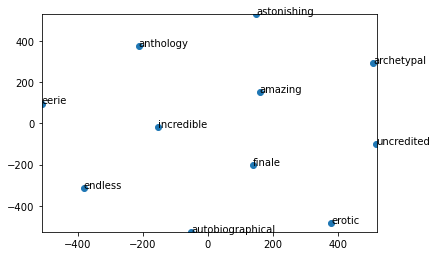

In [52]:
display_closestwords_tsnescatterplot(model, 'amazing', 200)

In [56]:
sentence_list = [sentence for sentence in sentences]

In [67]:
model.wv['the']

array([-0.72955   , -0.35294297,  0.06712879,  0.9026236 , -0.20832437,
        0.34128296,  0.13773593,  0.3962225 , -0.1563693 , -0.14334692,
       -1.4380058 , -0.06420678,  0.80492324, -1.248567  , -0.90257615,
        0.44920695,  1.1399527 , -1.0050762 ,  0.4498727 ,  0.18756506,
        0.27152374, -0.75510234, -0.9812753 , -0.5505843 , -1.8277273 ,
        0.8509979 , -0.23353687, -0.24192145,  0.07758838, -0.8066298 ,
        2.003729  , -0.20157161, -0.6131334 , -1.6420491 , -0.06005184,
       -0.61372066,  0.36365062,  0.55005366, -0.56064004, -0.48646417,
        1.0176075 ,  0.22590588, -0.33261117,  0.84476507, -0.13913544,
       -0.7831429 ,  0.9315403 ,  0.70219815,  0.3900852 , -0.5673715 ,
        0.04560212, -0.63623226, -0.21747716, -1.0669062 , -1.9031599 ,
       -0.55816877,  0.52022004,  0.14511259,  0.79650795, -0.9657973 ,
       -0.37824818,  0.09218594,  0.11043585, -0.12123673, -0.71721643,
        0.45891923, -0.01099255,  1.9392673 ,  0.5897959 ,  0.87

In [71]:
# find the index of the 2nd most common word ("of")
print('Index of "of" is: {}'.format(model.wv.vocab['of'].index))

Index of "of" is: 1


In [72]:
# what doesn't fit?
print(model.wv.doesnt_match("green blue red zebra".split()))

zebra


c:\users\tanse\documents\mystuff\temp\tempnlp\nlp\word2vec\venv\lib\site-packages\gensim\models\keyedvectors.py:877: FutureWarning: arrays to stack must be passed as a "sequence" type such as list or tuple. Support for non-sequence iterables such as generators is deprecated as of NumPy 1.16 and will raise an error in the future.
  vectors = vstack(self.word_vec(word, use_norm=True) for word in used_words).astype(REAL)


In [85]:
# convert the input data into a list of integer indexes aligning with the wv indexes
# Read the data into a list of strings.
def read_data(filename):
    """Extract the first file enclosed in a zip file as a list of words."""
    with zipfile.ZipFile(filename) as f:
        data = f.read(f.namelist()[0]).split()
    return data

def read_txt(filename):
    f = open(filename,'r') 
    data = f.read()
    f.close()
    return data.split()

def convert_data_to_index(string_data, wv):
    index_data = []
    for word in string_data:
        if word in wv:
            index_data.append(wv.vocab[word].index)
    return index_data

#str_data = read_data(text_dir)
str_data = read_txt(text_dir)
index_data = convert_data_to_index(str_data, model.wv)
print(str_data[:4], index_data[:4])

['anarchism', 'originated', 'as', 'a'] [5233, 3080, 11, 5]


In [103]:
# convert the wv word vectors into a numpy matrix that is suitable for insertion
# into our TensorFlow and Keras models
vector_dim = len(model.wv[list(model.wv.vocab.keys())[0]])
embedding_matrix = np.zeros((len(model.wv.vocab), vector_dim))
for i in range(len(model.wv.vocab)):
    embedding_vector = model.wv[model.wv.index2word[i]]
    if embedding_vector is not None:
        embedding_matrix[i] = embedding_vector

In [107]:
embedding_matrix.shape

(71290, 200)

## Keras Section

In [ ]:
# TODO
# Above we have the embedding matrix. Or alternatively the word vectors for each word.
# We can get each comment/sentence in a survey, assume the comment length < 1000.
# Convert it into a list (complete it with empty strings to length max 1000)
# replace each word in that list with its embedded vector representation
# Each comment will then be a 1000 X 200 matrix
# Flatten this out to a 200000 numpy vector
# Feed this into a neural network along with the labels